In [1]:
import os, sys
import pandas as pd
import numpy as np
#sys.path.append("/Users/liuxing/Documents/git/python/python3/StereoSiTE")
import stereosite

In [2]:
from stereosite.read.gem import Gem_Reader
gem_file = "/Users/liuxing/Documents/BGI_work/clinical_project/mouse_CT26/SS200000681TL_A1/SS200000681TL_A1.tissue.gem.10000"
gem_reader = Gem_Reader(gem_file)


/Users/liuxing/Documents/git/python/python3/StereoSiTE/stereosite/read/gem.py:112: FutureWarning: X.dtype being converted to np.float32 from int32. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X = expMtx, obs = obs, var = var)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


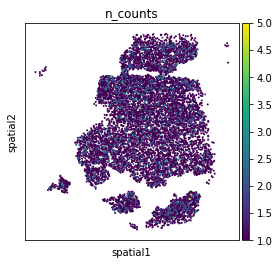

In [3]:
adata = gem_reader.gem2anndata()
adata.obs['n_counts'] = adata.X.sum(axis=1).A1
adata
import scanpy as sc
sc.pl.spatial(adata, color=['n_counts'], img_key='hires', spot_size=200)

In [19]:
adata.write("./test_adata.h5ad")

In [15]:
from stereosite.utils import m2h_homologene
m2h_homologene(adata)

AnnData object with n_obs × n_vars = 9166 × 12
    obs: 'x', 'y', 'n_counts'
    var: 'original_gene_symbol'
    obsm: 'spatial'

In [3]:
from stereosite.CN.deconvolution import Cell2location
adata_file = "./test_adata.h5ad"
ref_file = "./inf_aver_noCAF.csv"
cell2loc = Cell2location(ref_file, adata_file, bin_size = 50, gpu=False)
cell2loc.run_deconvolution()

Global seed set to 0


AssertionError: Failed in nopython mode pipeline (step: native lowering)
Storing i64 to ptr of i32 ('dim'). FE type int32